# Churn Rate Prediction with Machine Learning

### Importing the dataset and analysing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("telco_customer_churn.csv")

In [3]:
df.shape # Dataset sample number

(7043, 21)

In [4]:
df.isna().sum().sum() # Missing values number in the dataset

0

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
churn_label = {'Yes':1, 'No':0}
df.Churn.replace(churn_label, inplace=True)

In [9]:
df.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)

In [10]:
df.shape

(7043, 16)

In [11]:
df.dtypes

SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
Churn                 int64
dtype: object

### Data Preprocessing

In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [13]:
no_scaling_features = ['Partner', 'Dependents','MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
X = pd.get_dummies(df, columns=no_scaling_features, drop_first=True)

In [14]:
scaler = MinMaxScaler()
senior_citizen = scaler.fit_transform(df[['SeniorCitizen']])
tenure = scaler.fit_transform(df[['tenure']])
monthly_charges = scaler.fit_transform(df[['MonthlyCharges']])

In [15]:
X['SeniorCitizen'] = senior_citizen
X['tenure'] = tenure
X['MonthlyCharges'] = monthly_charges

In [16]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn', 'Partner_Yes',
       'Dependents_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [17]:
X

,SeniorCitizen,tenure,MonthlyCharges,Churn,Partner_Yes,Dependents_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.013889,0.115423,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0.0,0.472222,0.385075,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,0.027778,0.354229,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0.0,0.625000,0.239303,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0.0,0.027778,0.521891,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.333333,0.662189,0,1,1,0,1,0,0,...,0,1,0,1,0,1,1,0,0,1
7039,0.0,1.000000,0.845274,0,1,1,0,1,1,0,...,0,0,0,1,0,1,1,1,0,0
7040,0.0,0.152778,0.112935,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7041,1.0,0.055556,0.558706,1,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,1


### Resampling

Text(0.5, 1.0, 'Class Distribution Before Resampling')

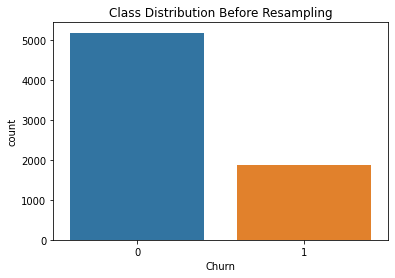

In [18]:
sns.countplot(x='Churn', data=df).set_title('Class Distribution Before Resampling')

In [19]:
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]

len(X_no),len(X_yes)

(5174, 1869)

In [20]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)

print(len(X_yes_upsampled))

5174


In [21]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)

Text(0.5, 1.0, 'Class Distribution After Resampling')

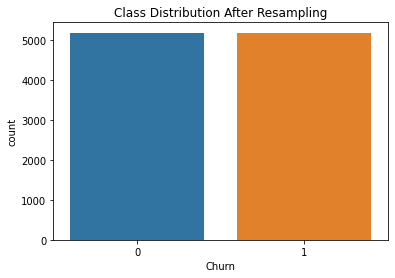

In [22]:
sns.countplot(x='Churn', data=X_upsampled).set_title('Class Distribution After Resampling')

### Dataset splitting

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
X = X_upsampled.drop(['Churn'], axis=1) # features
y = X_upsampled['Churn'] # target 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

## Machine Learning Models Creation

### Stochastic Gradient Descent

In [26]:
from sklearn.linear_model import SGDClassifier

In [27]:
sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train, y_train)

SGDClassifier()

In [28]:
y_pred = sgd_classifier.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1044
           1       0.74      0.81      0.77      1026

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



### AdaBoost

In [30]:
from sklearn.ensemble import AdaBoostClassifier

In [31]:
adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier()

In [32]:
y_pred = adaboost_classifier.predict(X_test)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1044
           1       0.75      0.79      0.77      1026

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



### Multi-Layer Perceptron

In [34]:
from sklearn.neural_network import MLPClassifier

In [35]:
mlp_classifier = MLPClassifier(max_iter=2000)
mlp_classifier.fit(X_train, y_train)

MLPClassifier(max_iter=2000)

In [36]:
y_pred = mlp_classifier.predict(X_test)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1044
           1       0.78      0.81      0.80      1026

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070



### Support Vectore Machines

In [38]:
from sklearn import svm

In [39]:
svm_classifier = svm.SVC()
svm_classifier.fit(X_train, y_train)

SVC()

In [40]:
y_pred = svm_classifier.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.74      0.76      1044
           1       0.75      0.81      0.78      1026

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
forest_classifier = RandomForestClassifier()
forest_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [88]:
y_pred = forest_classifier.predict(X_test)

In [89]:
accuracy_score(y_test, y_pred)

0.9101449275362319

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1044
           1       0.87      0.97      0.92      1026

    accuracy                           0.91      2070
   macro avg       0.92      0.91      0.91      2070
weighted avg       0.92      0.91      0.91      2070



## Model Parameter Optimization

### Grid Search

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
parameters = {'n_estimators':[50, 100, 150, 200, 250], 'max_depth': [10, 30, 50, 70, None], 'min_samples_split': [2, 5, 10]}
forest_classifier = RandomForestClassifier()

# n_jobs shows how many processors will be used, -1 indicates all
# cv is the number of fold cross validation
clf = GridSearchCV(estimator=forest_classifier, param_grid=parameters, n_jobs=-1, cv=5)

In [76]:
clf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 30, 50, 70, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [77]:
clf.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}

In [78]:
clf.best_score_

0.9012377329943051

### Applying Better Parameters

In [93]:
forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2)
forest_classifier.fit(X_train, y_train)

y_pred = forest_classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.9154589371980676

In [94]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1044
           1       0.87      0.97      0.92      1026

    accuracy                           0.92      2070
   macro avg       0.92      0.92      0.92      2070
weighted avg       0.92      0.92      0.92      2070

